In [30]:
%pip install pandas
import pandas as pd 

data = pd.read_csv('./reviews.csv')
data = data.head(10000)
data.tail()

Note: you may need to restart the kernel to use updated packages.


,Time_submitted,Review,Rating,Total_thumbsup,Reply
9995,2022-06-17 09:34:24,Please make sure that the panels don't lag on ...,3,0,NaN
9996,2022-06-17 09:32:57,"This app has become a problem, why do you alwa...",1,0,NaN
9997,2022-06-17 09:20:21,"The app is good, but the lyric won't show for ...",5,0,NaN
9998,2022-06-17 09:17:26,Good App..Doesn't have ads between songs and h...,4,0,NaN
9999,2022-06-17 09:14:54,Impossible to use on lock screen anymore. Trie...,2,0,NaN


In [31]:
data.isnull().sum()

Time_submitted       0
Review               0
Rating               0
Total_thumbsup       0
Reply             9979
dtype: int64

In [32]:
data.drop(['Time_submitted', 'Reply'], axis = 1, inplace = True)
data.isnull().sum()

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

/var/folders/l7/d0s506nd63lg66s2ty4wc8_00000gp/T/ipykernel_46330/3918982900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Rating', data=data, palette = 'pastel')


<Axes: xlabel='Rating', ylabel='count'>

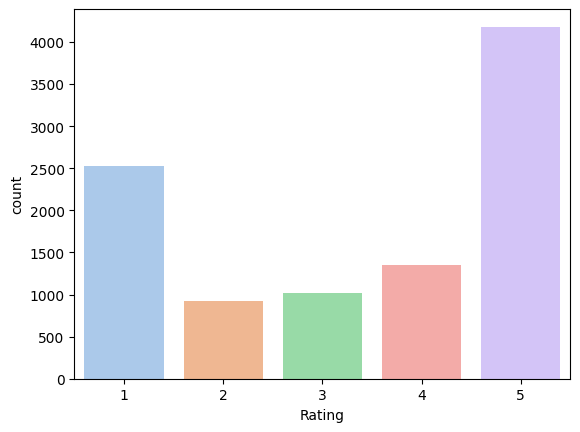

In [33]:
import seaborn as sns 
sns.countplot(x = 'Rating', data=data, palette = 'pastel')

In [34]:
def transform_ratings(rating) : 
    if rating == 5 or rating == 4 : 
        return "Good"
    if rating == 3 : 
        return "Neutral" 
    if rating == 2 or rating == 1 :
        return "Bad"

/var/folders/l7/d0s506nd63lg66s2ty4wc8_00000gp/T/ipykernel_46330/1248267072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Desc', data = data, palette = 'pastel')


,Review,Rating,Total_thumbsup,Desc,length
0,"Great music service, the audio is high quality...",5,2,Good,112
1,Please ignore previous negative rating. This a...,5,1,Good,86
2,"This pop-up ""Get the best Spotify experience o...",4,0,Good,106
3,Really buggy and terrible to use as of recently,1,1,Bad,47
4,Dear Spotify ... why do I get songs that I di...,1,1,Bad,105


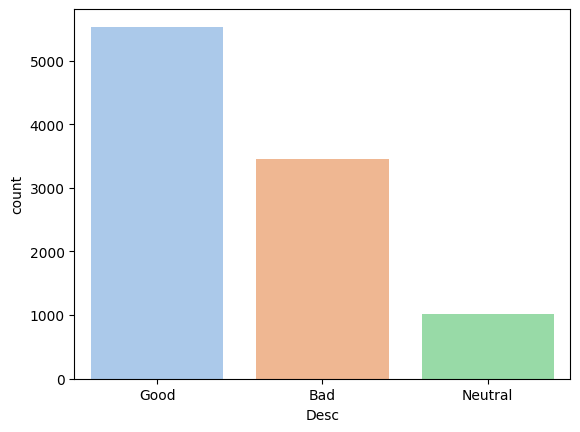

In [35]:
data['Desc'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()
sns.countplot(x = 'Desc', data = data, palette = 'pastel')
data.head()

<Axes: xlabel='length', ylabel='Total_thumbsup'>

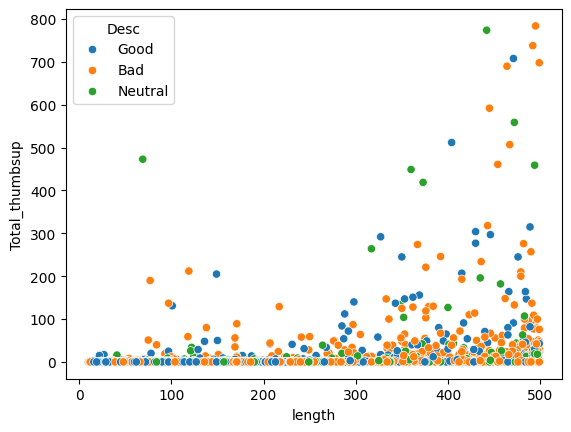

In [36]:
sns.scatterplot(x = data['length'][data.length < 500], y = data ['Total_thumbsup'][data.Total_thumbsup < 800], hue = data['Desc'])

Note: you may need to restart the kernel to use updated packages.


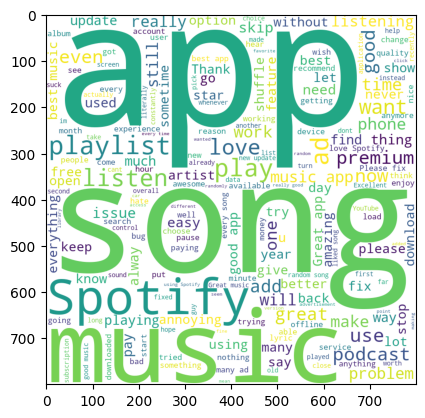

In [37]:
%pip install wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

reviews = " ".join(data.loc[:, 'Review'])
wordcloud = WordCloud(width = 800, height = 800, background_color= 'white', min_font_size= 10).generate(reviews)
plt.imshow(wordcloud)


In [38]:
import re 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer

data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda x : " ".join(x.lower() for x in x.split()))
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))

stop_words = stopwords.words('english')
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word : " ".join(word for word in word.split() if word not in stop_words))

stemmer = PorterStemmer()
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: " ".join(stemmer.stem(word) for word in word.split()))

data.head()["Review"]

0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    pop-up get best spotifi experi android 12 anno...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [39]:
from sklearn.model_selection import train_test_split
X = data['Review']
y = data['Desc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500,), (2500,), (7500,), (2500,))

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train

array([2, 1, 1, ..., 0, 1, 1])

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train) 
X_test_count = cv.transform(X_test)
print(X_train_count)

  (0, 299)	1
  (0, 2981)	1
  (0, 3289)	1
  (0, 3844)	1
  (0, 3859)	1
  (0, 4729)	1
  (0, 5539)	1
  (1, 529)	1
  (1, 1982)	1
  (1, 3101)	1
  (1, 3598)	1
  (1, 3768)	1
  (1, 4847)	1
  (2, 1786)	1
  (2, 1902)	1
  (2, 2307)	1
  (2, 3380)	1
  (3, 9)	1
  (3, 723)	1
  (3, 2273)	1
  (3, 2923)	1
  (3, 3006)	1
  (3, 3654)	1
  (3, 3767)	1
  (3, 3774)	1
  :	:
  (7497, 3465)	1
  (7497, 3570)	1
  (7497, 3573)	1
  (7497, 3611)	1
  (7497, 3938)	1
  (7497, 4014)	2
  (7497, 4149)	1
  (7497, 4582)	2
  (7497, 4714)	1
  (7497, 4767)	1
  (7497, 5131)	1
  (7497, 5290)	1
  (7497, 5329)	1
  (7497, 5539)	2
  (7497, 5664)	1
  (7497, 5734)	2
  (7497, 5767)	1
  (7497, 5801)	1
  (7497, 5870)	1
  (7498, 814)	1
  (7498, 3859)	1
  (7498, 4729)	1
  (7499, 682)	1
  (7499, 3907)	1
  (7499, 4916)	1


In [42]:
tfidf = TfidfVectorizer(analyzer= 'char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train) 
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf)

  (0, 155)	0.0625370812906146
  (0, 165)	0.11960974535517063
  (0, 358)	0.07737325615990526
  (0, 362)	0.17297899588817428
  (0, 422)	0.14440138454988607
  (0, 432)	0.1902448928024317
  (0, 465)	0.06165341397611907
  (0, 479)	0.08938887777179104
  (0, 507)	0.1015625726234374
  (0, 520)	0.1257352299577101
  (0, 1558)	0.09639150755136369
  (0, 1559)	0.11522088975009732
  (0, 1824)	0.17129653026832925
  (0, 1825)	0.09691680270258038
  (0, 1832)	0.1399364822345267
  (0, 2288)	0.07225540330593208
  (0, 2315)	0.1584042079225752
  (0, 2549)	0.06734199025695699
  (0, 2572)	0.16104561692825603
  (0, 2870)	0.10181415790253423
  (0, 2871)	0.12357738408001205
  (0, 3119)	0.08708335546032393
  (0, 3129)	0.16460086757341555
  (0, 3829)	0.17456246534805672
  (0, 3848)	0.18067647550268742
  :	:
  (7499, 1797)	0.1734498809937973
  (7499, 1799)	0.2508074428276396
  (7499, 2085)	0.12607478628859836
  (7499, 2095)	0.1870733124348155
  (7499, 2363)	0.19055995604192832
  (7499, 2365)	0.1928793197602259
  (7